In [ ]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from pathlib import Path
import matplotlib.pyplot as plt


In [ ]:
# traffic_crash_url = "https://data.cityofchicago.org/resource/85ca-t3if.json"
# people_url = "https://data.cityofchicago.org/resource/u6pd-qa9d.json"
# vehicles_url= "https://data.cityofchicago.org/resource/68nd-jvt3.json"

# people = requests.get(people_url).json()
#people_df = pd.DataFrame()
# people[0]

In [ ]:
# Import csv files 
crashes_file = Path("Resources/Crashes.csv")
people_file = Path("Resources/People.csv")
vehicles_file = Path("Resources/Vehicles.csv")

# Create dataframe
crashes_df = pd.read_csv(crashes_file, encoding="ISO-8859-1")
people_df = pd.read_csv(people_file, encoding="ISO-8859-1")
vehicles_df = pd.read_csv(vehicles_file, encoding="ISO-8859-1")

In [ ]:
crashes_df.columns

In [ ]:
crashes_df.head()

In [ ]:
people_df.columns

In [ ]:
people_df.head()

In [ ]:
vehicles_df.columns


In [ ]:
vehicles_df.head()

In [43]:
# Traffic accidents in City of Chicago – When and where is it safest to travel through Chicago, looking at just serious injuries and fatalities, last 5 years (2018-2022)

In [44]:
# What are the most fatal intersections in Chicago?


In [45]:
# When are the most fatal months? (time series analysis) – Jian Liu


Analysis of Accident Causes (Cynthia Saving)

What are the most common causes for all accidents?
1. Failing to Yield Right of Way
2. Following Too Closely
3. Improper Overtaking/Passing
4. Failing to Reduce Speed to Avoid Crash
5. Driving Skills/Knowledge/Experience

What are most common causes for accidents with injuries?
1. Failing to Yield Right of Way
2. Following Too Closely
3. Failing to Reduce Speed to Avoid Crash
4. Disregarding Traffic Signals
5. Improper Turning/No Signal

However, 47% of all accidents and 36% of accidents with injuries do not have a primary contributory cause reported.

In [46]:
# What are the most common causes? (summary statistics) – Cynthia Saving

# Counts of top 10 primary causes all accidents
causes_counts = crashes_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(10)

# Create horizontal bar chart
y_axis = causes_counts.index
width = causes_counts.values
plt.barh(y_axis, width, height=0.8, align='center')
plt.title("Top Causes of All Accidents in Chicago")
plt.xlabel("Number of Accidents in 2022")
plt.savefig("Images/Causes.png")
plt.show()

In [ ]:
# Calculate percentage of total accidents that do not have primary cause reported.
total_accidents = len(crashes_df)
unable_to_determine = crashes_df['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE'
not_applicable = crashes_df['PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE'
no_causes_count = len(crashes_df.loc[unable_to_determine]) + len(crashes_df.loc[not_applicable])
no_cause_percent = round(no_causes_count / total_accidents * 100)
print(f"{no_cause_percent}% of all accidents do not have a primary contributory cause reported.") 


In [ ]:
# Filter dataframe to only rows with injuries
injuries = crashes_df['INJURIES_TOTAL'] > 0
inj_causes_df = crashes_df.loc[injuries]

#Counts of top 10 primary causes of accidents with injuries
inj_cause_counts = inj_causes_df.loc[injuries]['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(10)

# Create horizontal bar chart
y_axis = inj_cause_counts.index
width = inj_cause_counts.values
plt.barh(y_axis, width, height=0.8, align='center')
plt.title("Top Causes of Accidents with Injuries in Chicago")
plt.xlabel("Number of Accidents in 2022")
plt.savefig("Images/Injury_Causes.png")
plt.show()


In [ ]:
# Calculate percentage of accidents with injuries that do not have primary cause reported.
inj_total_accidents = len(inj_causes_df)
inj_unable_to_determine = inj_causes_df['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE'
inj_not_applicable = inj_causes_df['PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE'
inj_no_causes_count = len(inj_causes_df.loc[unable_to_determine]) + len(inj_causes_df.loc[not_applicable])
inj_no_cause_percent = round(inj_no_causes_count / inj_total_accidents * 100)
print(f"{inj_no_cause_percent}% of accidents with injuries do not have a primary contributory cause reported.") 

In [47]:
# What driver age is most prevalent? (comparison) – Sonia Singh


In [48]:
# What vehicle age is most common? (correlation) – Tony Quintana


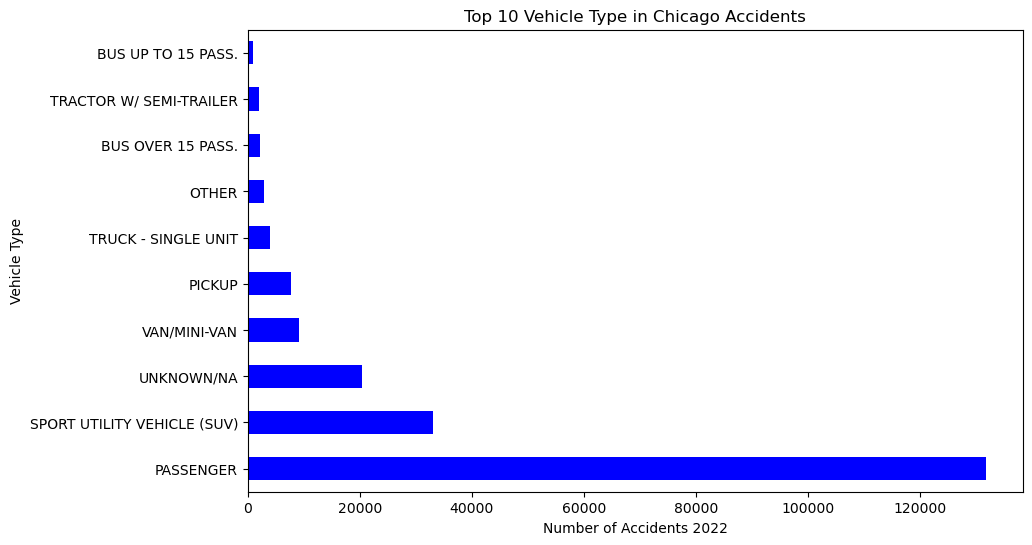

In [73]:
# What vehicle make and/or Type is most common? (comparison) – Sean Bell
# tYPE is the column representing the vehicle makes
vehicle_type_counts = vehicles_df['VEHICLE_TYPE'].value_counts()

# Select the top 10 vehicle makes
top_10 = vehicle_type_counts.head(10)

# Visualization of the top 10 vehicle makes
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color='blue')
plt.title('Top 10 Vehicle Types in Chicago Accidents')
plt.ylabel('Vehicle Type')
plt.xlabel('Number of Accidents 2022')
plt.show()
plt.savefig("top10vehicletypesinchicagoaccdents.png")

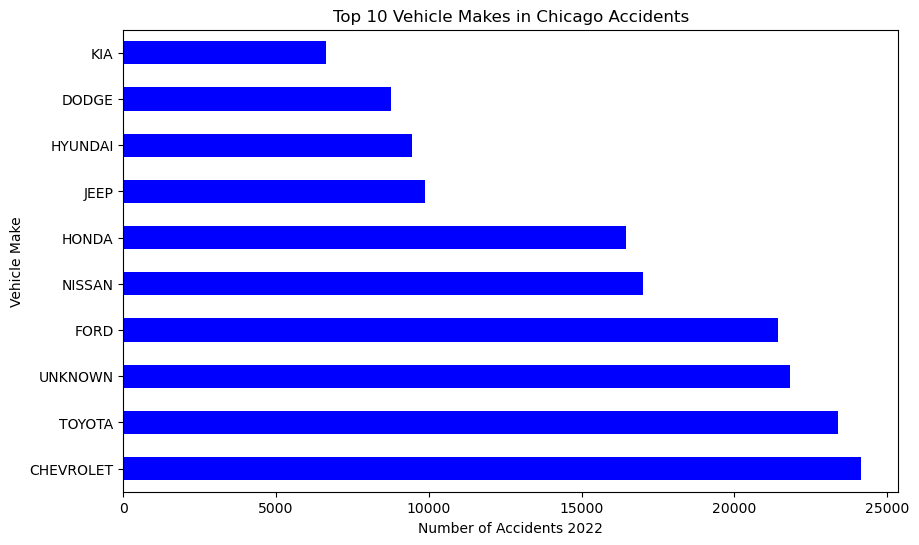

FileNotFoundError: [Errno 2] No such file or directory: 'Images/Injury_Causes.png'

<Figure size 640x480 with 0 Axes>

In [74]:
# What vehicle make and/or Type is most common? (comparison) – Sean Bell

#MAKE is the column representing the vehicle makes
vehicle_make_counts = vehicles_df['MAKE'].value_counts()

# Select the top 10 vehicle makes
top_10 = vehicle_make_counts.head(10)

# Visualization of the top 10 vehicle makes
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color='blue')
plt.title('Top 10 Vehicle Makes in Chicago Accidents')
plt.ylabel('Vehicle Make')
plt.xlabel('Number of Accidents 2022')
plt.show()
plt.savefig("Images/vehiclemakes.png")
